In [1]:
import import_ipynb
import os
from dataset import UTKFaceDataset
from model import AgePredictionModel
from face_detector import FaceDetector
from sklearn.model_selection import train_test_split

In [2]:
# 데이터셋의 주소
dataset_dir = os.path.join("..", "UTKface")
# input 이미지의 주소 
test_image_path = os.path.join("..", "input", "your_image_name")

In [3]:
dataset = UTKFaceDataset(dataset_dir)
model = AgePredictionModel()
detector = FaceDetector()

C:\Users\master\anaconda33\envs\Computer_graphics\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 데이터셋을 로드합니다.
dataset.load_data()

In [5]:
# 이미지를 전처리합니다.(4차원 배열 + Min-Max scaling)
x, y = dataset.preprocess_data()

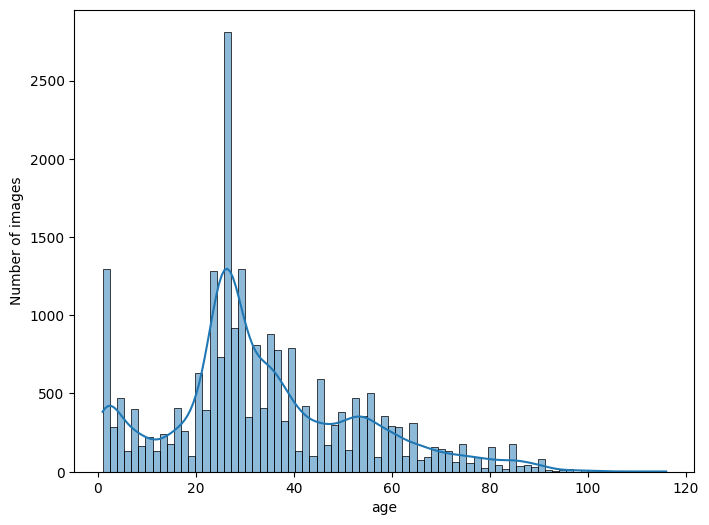

In [6]:
# 나이에 따른 이미지 수를 시각화합니다. 
dataset.visualize_data()

In [7]:
# 이미지를 훈련 이미지, 테스트 이미지로 분할합니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
# 모델을 학습시킵니다.
history = model.train(x_train, y_train)

Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - loss: 687.0308 - mae: 20.3174 - val_loss: 377.7712 - val_mae: 14.9498
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - loss: 420.3244 - mae: 15.8399 - val_loss: 312.6158 - val_mae: 13.9482
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - loss: 386.0646 - mae: 15.0112 - val_loss: 229.9365 - val_mae: 12.0487
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - loss: 283.3877 - mae: 12.8245 - val_loss: 187.9285 - val_mae: 10.6419
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - loss: 236.6108 - mae: 11.6469 - val_loss: 182.0207 - val_mae: 9.9016
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - loss: 223.2987 - mae: 11.2518 - val_loss: 183.1329 - val_mae: 9.7825
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - loss: 208.8822 - mae: 10.8617 - val_loss: 140.8877 - val_mae: 8.9028
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - loss: 189.1560 - mae: 10.3072 - val_loss: 132.7169 - val_

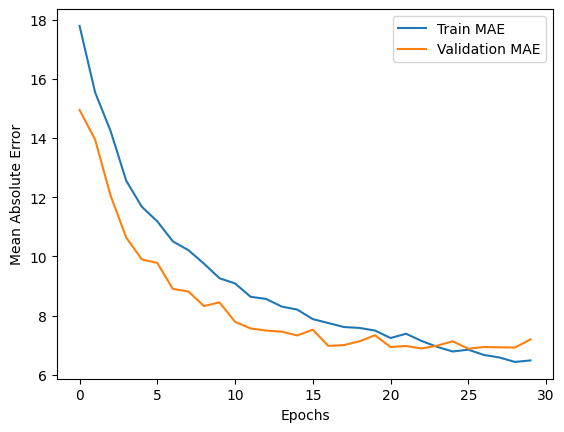

In [9]:
# Epoch에 따른 Mean Absolute Error를 출력합니다.
model.plot_training_history()

In [20]:
# 입력된 이미지중 얼굴부분을 추출합니다.
image, face = detector.detect_faces(test_image_path)

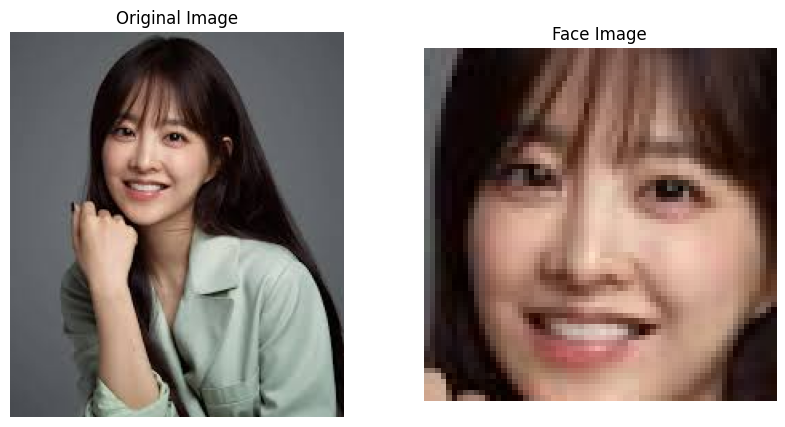

In [21]:
# 입력된 사진과 추출된 얼굴 사진을 시각화합니다.
detector.visualize_face(image, face)

In [22]:
# 추출된 얼굴 사진을 전처리합니다.
your_input = detector.test_image_preprocess(face)

In [23]:
# 주어진 이미지에 대한 나이를 출력합니다. 
model.predict(your_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Age: 29
